# Nomalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing informations.

## MinMax Scaling

$$X'_i = \frac{X_i - X_{min}}{X_{max} - X_{min}}$$
$$\text{Rang will be always between 0 to 1}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../Datasets/Wine/wine_data.csv", usecols = [0, 1, 2], header = None)
df.columns = ["Class label", "Alcohol", "Malic acid"]
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


[]

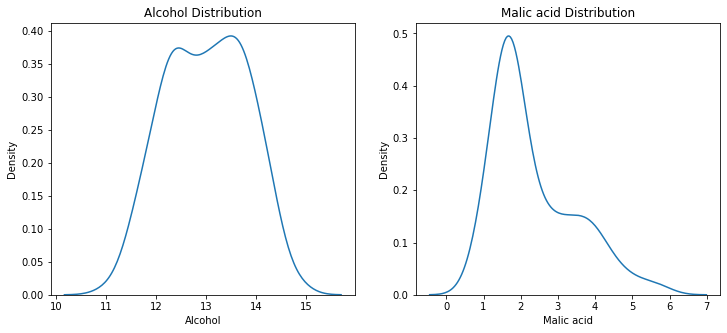

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

sns.kdeplot(df["Alcohol"], ax = ax1)
ax1.set_title("Alcohol Distribution")


sns.kdeplot(df["Malic acid"], ax = ax2)
ax2.set_title("Malic acid Distribution")

plt.plot()

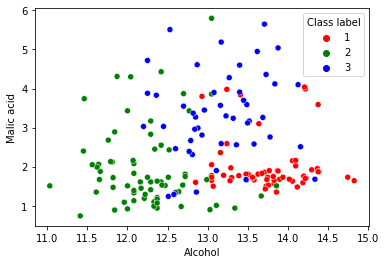

In [20]:
color_dict = {1: "red", 2: "green", 3: "blue"}
sns.scatterplot(x = df["Alcohol"], y = df["Malic acid"], hue = df["Class label"], palette = color_dict)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Class label", axis = 1),
    df["Class label"],
    test_size = 0.3,
    random_state = 0
)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [25]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [26]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


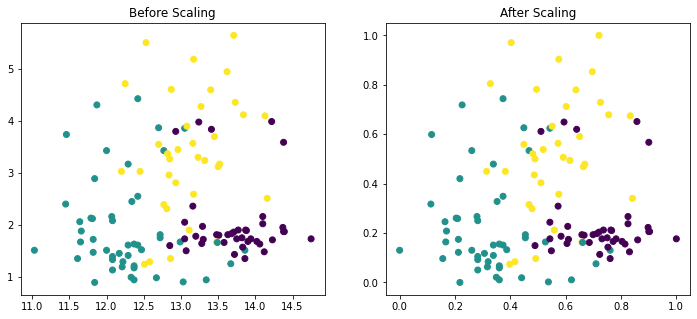

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train["Alcohol"], X_train["Malic acid"], c = y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Alcohol"], X_train_scaled["Malic acid"], c = y_train)
ax2.set_title("After Scaling")

plt.show()

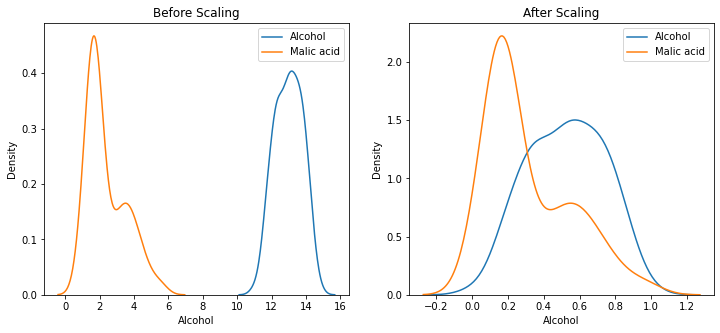

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
sns.kdeplot(X_train["Alcohol"], ax = ax1)
sns.kdeplot(X_train["Malic acid"], ax = ax1)
ax1.legend(["Alcohol", "Malic acid"])
ax1.set_title("Before Scaling")

# after scaling
sns.kdeplot(X_train_scaled["Alcohol"], ax = ax2)
sns.kdeplot(X_train_scaled["Malic acid"], ax = ax2)
ax2.legend(["Alcohol", "Malic acid"])
ax2.set_title("After Scaling")

plt.show()

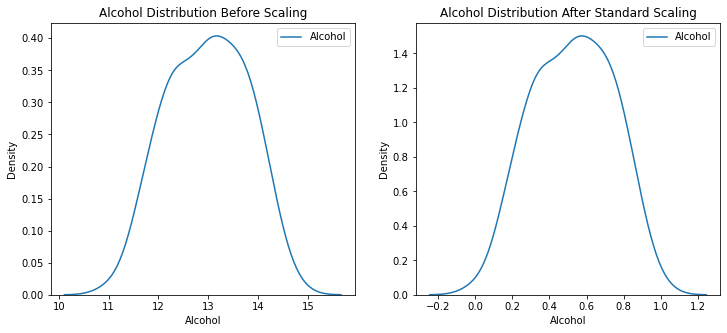

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
sns.kdeplot(X_train["Alcohol"], ax = ax1)
ax1.set_title("Alcohol Distribution Before Scaling")
ax1.legend(["Alcohol"])

# after scaling
sns.kdeplot(X_train_scaled["Alcohol"], ax = ax2)
ax2.set_title("Alcohol Distribution After Standard Scaling")
ax2.legend(["Alcohol"])

plt.show()

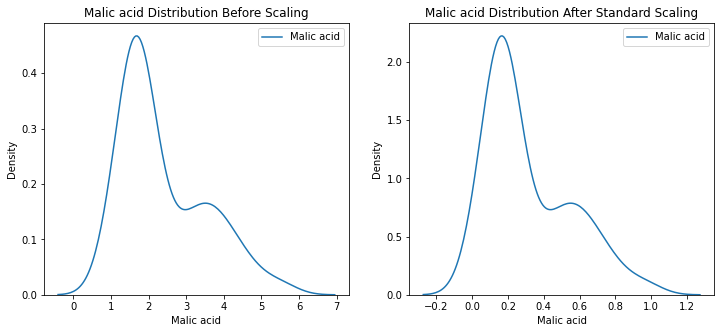

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
sns.kdeplot(X_train["Malic acid"], ax = ax1)
ax1.set_title("Malic acid Distribution Before Scaling")
ax1.legend(["Malic acid"])

# after scaling
sns.kdeplot(X_train_scaled["Malic acid"], ax = ax2)
ax2.set_title("Malic acid Distribution After Standard Scaling")
ax2.legend(["Malic acid"])

plt.show()

## Mean Normalization

$$X'_i = \frac{X_i - X_{mean}}{X_{max} - X_{min}}$$

$$\text{Range will be between -1 to +1}$$

## Max Absolute Scaling

$$X'i = \frac{X_i}{|X_{max}|}$$

## Robust Scaling

$$X'_i = \frac{X_i - X_{median}}{IQR}$$

# Normalization vs Standardization

**First questioned these:**

- Is feature scaling required?
- Most of the time, standardization is mostly used with good result. Then most used scaling technique is minmax scaling.